In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_diabetes

1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Обозначьте целевую переменную за `y`, а остальные данные за `X`.


In [4]:
data = load_diabetes()
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X = data['data']
y = data['target']

In [26]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

2. (1 балл) Выведите основную статистическую информацию о данных. Сделайте количественное описание датасета: число строк (объектов), число столбцов (признаков), статистику по признакам.


In [6]:
X.shape, y.shape

((442, 10), (442,))

3. (1 балл) Выведите тип данных каждого признака и целевой переменной. Убедитесь, что в данных все признаки являются числовыми. В случае, если это не так, удалите нечисловые колонки.


In [7]:
for i in range(10):
    print(f'Тип данных в {i+1} столбце: {X.T[i].dtype}')

Тип данных в 1 столбце: float64
Тип данных в 2 столбце: float64
Тип данных в 3 столбце: float64
Тип данных в 4 столбце: float64
Тип данных в 5 столбце: float64
Тип данных в 6 столбце: float64
Тип данных в 7 столбце: float64
Тип данных в 8 столбце: float64
Тип данных в 9 столбце: float64
Тип данных в 10 столбце: float64


4. (1 балл) Убедитесь, что нет пропущенных значений в данных и у целевой переменной. В случае, если это не так, заполните пропуски медианными значениями.


In [8]:
for i in range(10):
    print(f'Количество пропущенных данных в {i+1} столбце: {sum(np.equal(X.T[i], None))}')


Количество пропущенных данных в 1 столбце: 0
Количество пропущенных данных в 2 столбце: 0
Количество пропущенных данных в 3 столбце: 0
Количество пропущенных данных в 4 столбце: 0
Количество пропущенных данных в 5 столбце: 0
Количество пропущенных данных в 6 столбце: 0
Количество пропущенных данных в 7 столбце: 0
Количество пропущенных данных в 8 столбце: 0
Количество пропущенных данных в 9 столбце: 0
Количество пропущенных данных в 10 столбце: 0


5. (1 балл) Постройте гистограмму распределения целевой переменной. Сделайте вывод по графику. Предположите, какому виду распределения она принадлежит.


Text(0.5, 1.0, 'Гистограмма распределения целевой переменной')

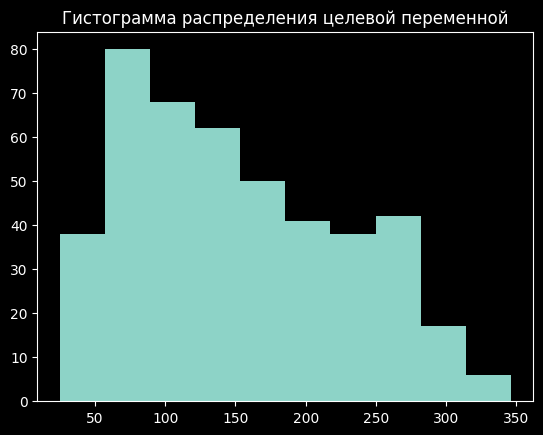

In [9]:
plt.hist(y)
plt.title('Гистограмма распределения целевой переменной')

6. (4 балл) Обучите модель линейной регрессии на рассматриваемых данных, написанную своими руками. Проиллюстрируйте работу модели графиком обучения и распределения целевой переменной. Выведите уравнение полученной гиперплоскости.


In [10]:
import pandas as pd

In [11]:
X_df = pd.DataFrame(X, columns=data['feature_names'])
Y_df = pd.DataFrame(y)

In [12]:
class Model(object):
    """Модель множественной регрессии"""
    def __init__(self, X, Y):
        self.b = [0 for i in range(X.shape[0] + 1)]
           
    def predict(self, X):
        answer = self.b[0]
        for i in range(1, len(self.b)):
            answer += self.b[i] * X[i-1]
        return answer
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y[0])**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.01, accuracy=1e-5, max_steps=20000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            
            dJ0 = sum(self.predict(X) - Y[0]) /len(X)
            self.b[0] -= alpha * dJ0
            
            for j in range(1, len(self.b)):
                dJj = sum((self.predict(X) - Y[0]) * X[j-1]) / len(X)
                self.b[j] -= alpha * dJj
  
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if step > 1 and new_err + accuracy > errors[-2]:
                break
        return steps, errors
    
    


In [13]:
X.T.shape

(10, 442)

In [27]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [36]:
Y_df

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [29]:
model = Model(X.T, Y_df)
steps, errors = model.fit(X.T, Y_df)
J = model.error(X.T, Y_df)
print("error after gradient descent:", J)

error after gradient descent: 63551.21576942613


In [30]:
model.b

[152.13348416289602,
 -6.946223560029187,
 -236.53356606997764,
 527.8823782199487,
 321.8362274978096,
 -149.80364558459206,
 -38.24931986716371,
 -180.04069384149588,
 105.40743870524277,
 509.15632301347574,
 69.78943358527331]

In [35]:
X.T.shape

(10, 442)

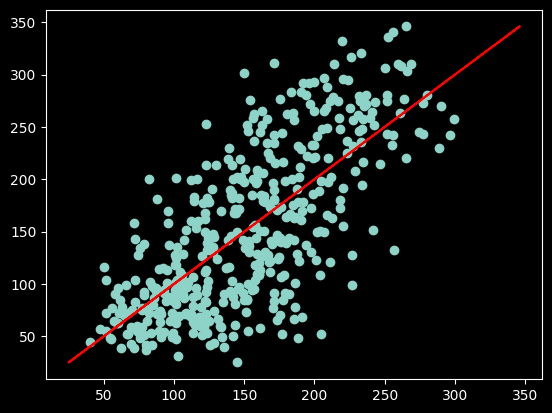

In [15]:
y_pred = model.predict(X.T)
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

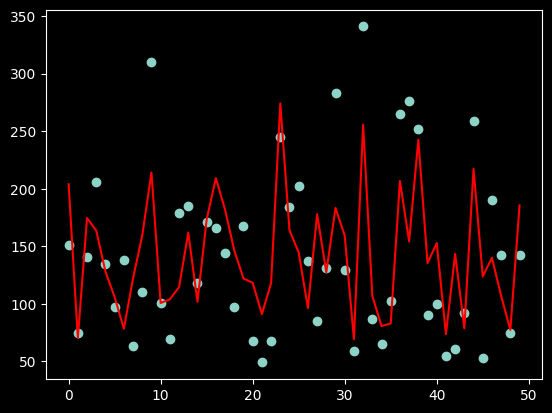

In [32]:
y_pred = model.predict(X.T)
plt.scatter(range(50), y[:50])
plt.plot(range(50), y_pred[:50], 'r')

In [16]:
y_pred

array([203.89101328,  70.27272111, 174.53170451, 163.61414158,
       128.02092991, 105.79150987,  78.35685601, 122.13392585,
       159.43668786, 214.09289348, 100.71633995, 103.88445388,
       114.5647513 , 161.81951914, 101.7201976 , 173.30773103,
       209.19855434, 181.78085797, 146.38329816, 121.99895202,
       118.2103126 ,  91.00993795, 117.98846491, 274.13414776,
       163.83245187, 144.6049776 ,  96.37135835, 177.84626398,
       127.42431873, 183.29164736, 159.33257375,  69.26904959,
       255.76226695, 106.81066379,  80.65098185,  82.92386832,
       206.70664805, 154.22440133, 242.58743327, 135.31280743,
       152.79764508,  73.55447304, 143.27635031,  78.66930218,
       217.31251985, 123.71718273, 139.96094444, 106.93965766,
        77.33950183, 185.52693568, 157.45341054, 167.13397322,
       133.37359336, 157.63881919, 141.07636245,  74.17653248,
       204.90423694,  79.87635125,  95.73902306, 133.59218982,
       115.04037571, 175.15793051,  67.13071031, 100.47

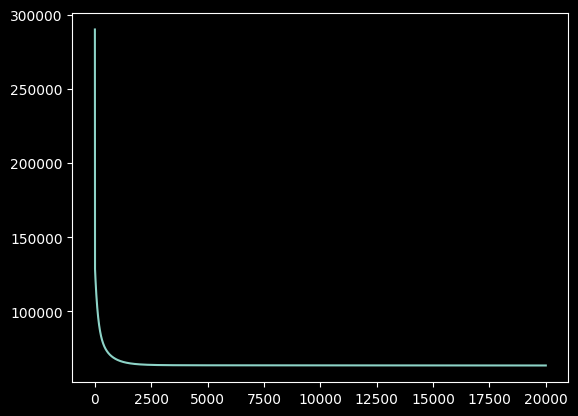

In [17]:
plt.plot(steps, errors)

7. (2 балл) Обучите модель `LinearRegression()` линейной регрессии на рассматриваемых данных из библиотеки `sklearn`. Выведете уравнение полученной гиперплоскости. Убедитесь, что уравнения гиперплоскостей, полученных с помощью модели написанной своими руками и библиотечной, будут примерно одинаковыми.


In [18]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

In [19]:
np.round(model.coef_, 3)

array([ -10.01 , -239.816,  519.846,  324.385, -792.176,  476.739,
        101.043,  177.063,  751.274,   67.627])

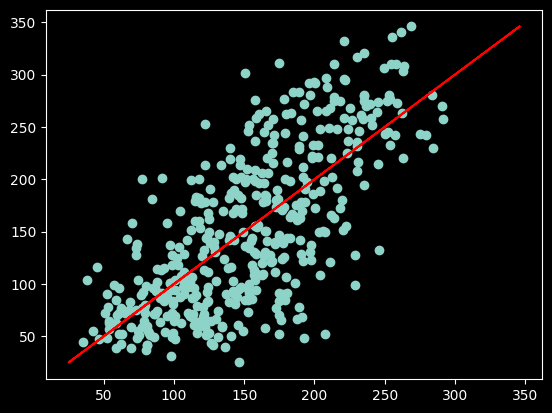

In [20]:
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

8. (1 балл) Оцените работу моделей, рассчитав для каждой из них метрики: коэффициент детерминации и ошибку MSE. Сделайте выводы по качеству работы моделей.


In [21]:
r2_score(y, y_pred) 

0.5177484222203499

In [22]:
mean_squared_error(y, y_pred)

2859.69634758675